In [1]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import os, glob

In [26]:
path = '../Chapter3/dogs-vs-cats/'
files = glob.glob(os.path.join(path, '*/*.jpg'))

In [27]:
no_of_images = len(files)

In [28]:
no_of_images

25000

In [29]:
shuffle = np.random.permutation(no_of_images)

In [30]:
os.mkdir(os.path.join(path, 'valid'))

In [31]:
for t in ['train', 'valid']:
    for folder in ['dog/', 'cat/']:
        os.mkdir(os.path.join(path, t, folder))

In [32]:
for i in shuffle[:2000]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'valid', folder, image))

In [33]:
for i in shuffle[2000:]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'train', folder, image))

In [66]:
### Loading data into Pytorch tensors ###
simple_transform = transforms.Compose([
    transforms.Scale((256,256)), # scale the size, should be 256, not 224
    transforms.ToTensor(), # The order should be right
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])
train = ImageFolder('dogs-vs-cats/train', simple_transform) # read images
valid = ImageFolder('dogs-vs-cats/valid', simple_transform)

In [65]:
train

Dataset ImageFolder
    Number of datapoints: 23000
    Root Location: dogs-vs-cats/train
    Transforms (if any): Compose(
                             Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [61]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [62]:
train.classes

['cat', 'dog']

In [69]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    print(inp)
    plt.imshow(inp)

[[[7.96078429e-01 6.43137274e-01 3.41176493e-01]
  [8.03921575e-01 6.50980404e-01 3.49019628e-01]
  [8.15686266e-01 6.62745106e-01 3.60784333e-01]
  ...
  [9.56862723e-01 7.96078438e-01 4.70588250e-01]
  [9.45098032e-01 7.88235294e-01 4.78431385e-01]
  [9.37254886e-01 7.84313736e-01 4.74509821e-01]]

 [[7.96078429e-01 6.43137274e-01 3.41176493e-01]
  [8.03921575e-01 6.50980404e-01 3.49019628e-01]
  [8.15686266e-01 6.62745106e-01 3.60784333e-01]
  ...
  [9.56862723e-01 7.99999996e-01 4.70588250e-01]
  [9.49019577e-01 7.92156853e-01 4.82352955e-01]
  [9.41176459e-01 7.88235294e-01 4.78431385e-01]]

 [[7.96078429e-01 6.43137274e-01 3.41176493e-01]
  [8.03921575e-01 6.50980404e-01 3.49019628e-01]
  [8.15686266e-01 6.62745106e-01 3.60784333e-01]
  ...
  [9.60784323e-01 7.99999996e-01 4.78431385e-01]
  [9.49019577e-01 7.92156853e-01 4.82352955e-01]
  [9.41176459e-01 7.88235294e-01 4.78431385e-01]]

 ...

 [[6.03921580e-01 4.82352941e-01 2.19607851e-01]
  [6.03921580e-01 4.82352941e-01 2.1960

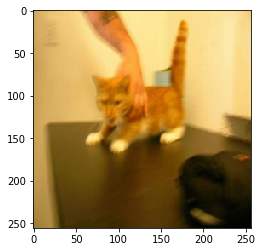

In [70]:
imshow(train[0][0])

In [51]:
# Loading PyTorch tensors as batches, number of parallelization = 3
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)

In [52]:
# Building the network architecture
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

is_cuda = torch.cuda.is_available()
if is_cuda:
    print('CUDA inside')
    model_ft = model_ft.cuda()

CUDA inside


In [53]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [54]:
model_ft.fc = nn.Linear(num_ftrs, 2)